In [1]:
from csv import DictReader
drzave = []
turisti    = [[], [], [], [], [], [], [], [], [], [], []]
prenocitve = [[], [], [], [], [], [], [], [], [], [], []]

reader = DictReader(open('podatki/turisti_po_drzavah.csv', 'rt', encoding='latin1'))
first = True
for row in reader:
    drz = row["drzava"]
    if drz == "Drzava potovanja  - SKUPAJ":
        continue
    drzave.append(drz)
    i = 7
    while i < 18:
        turisti[i-7].append(int(row["tur" + str(i)]))
        prenocitve[i-7].append(int(row["pren" + str(i)]))
        i += 1          

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
data07 = []
data17 = []
for i in range(len(drzave)):
    data07.append((drzave[i], turisti[0][i]))
    data17.append((drzave[i], turisti[10][i]))

data07.sort(key=itemgetter(1))  
a = []
b = []
for id, key in data07:
    a.append(id)
    b.append(key)
    
print(b)

b2 = b[-10:]
a2 = a[-10:]

plt.figure(figsize=(20,8))   
plt.barh(np.arange(len(b2)), b2, tick_label=a2)
plt.show()

[0, 2, 3, 7, 14, 33, 47, 62, 69, 74, 92, 97, 126, 127, 128, 137, 161, 211, 220, 235, 278, 285, 322, 385, 496, 551, 570, 586, 613, 646, 707, 778, 824, 1011, 1435, 1571, 1867, 2066, 2120, 2284, 2830, 3391, 3751, 4082, 4311, 6663, 8742, 14276, 14879, 22393, 26373, 28699, 29235]


<Figure size 2000x800 with 1 Axes>

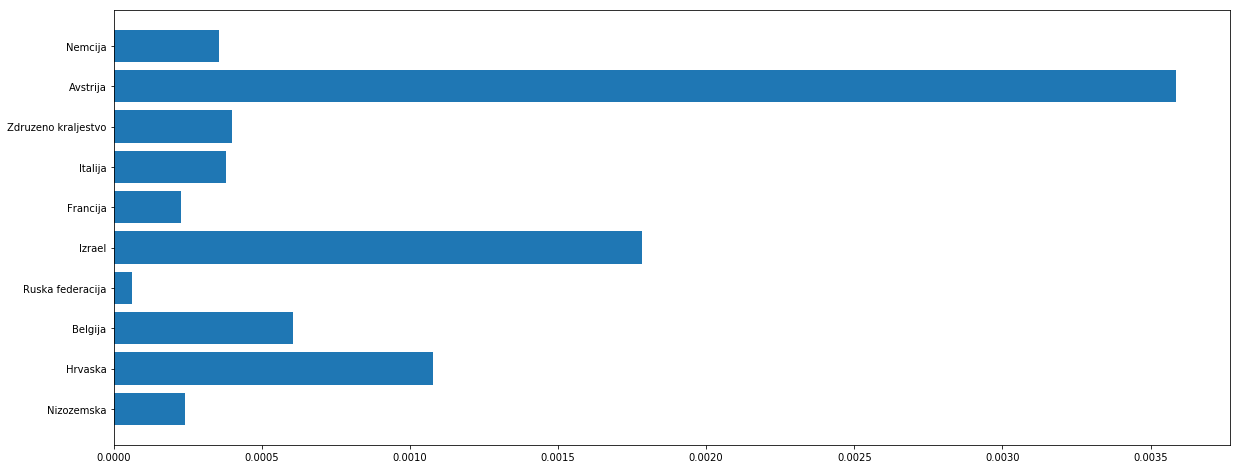

In [3]:
#populacije držav v milijonih
populations = [17, 4, 11, 143, 8, 65, 59, 66, 8, 82]
b2_population = []
a2_population = []
for x, y in zip(b2, populations):
    b2_population.append(x / (y * 1000000))

plt.figure(figsize=(20,8))   
plt.barh(np.arange(len(b2_population)), b2_population, tick_label=a2)
plt.show()

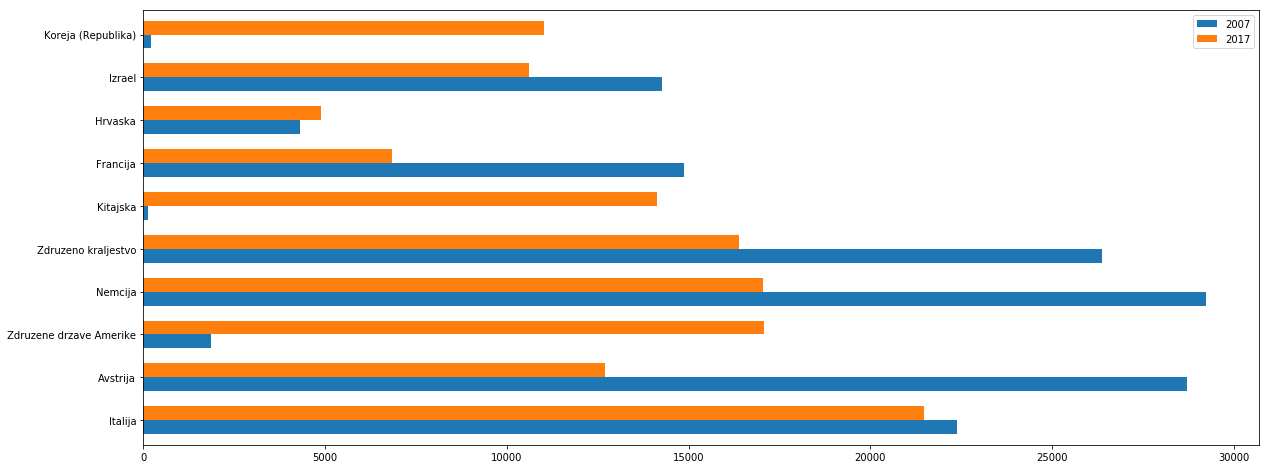

In [4]:
import pandas

countries = ["Italija", "Avstrija", "Zdruzene drzave Amerike", "Nemcija", "Zdruzeno kraljestvo", "Kitajska", "Francija", "Hrvaska", "Izrael", "Koreja (Republika)"]

a07 = []
b07 = []
for id, key in data07:
    a07.append(id)
    b07.append(key)

a17 = []
b17 = []
for id, key in data17:
    a17.append(id)
    b17.append(key)    
    
absolute07 = []
absolute17 = []
for country in countries:
    absolute07.append(b07[a07.index(country)])
    absolute17.append(b17[a17.index(country)])

df = pandas.DataFrame({'2007': absolute07, '2017': absolute17}, index = countries)
 
df.plot.barh(width = 0.65, figsize=(20, 8));

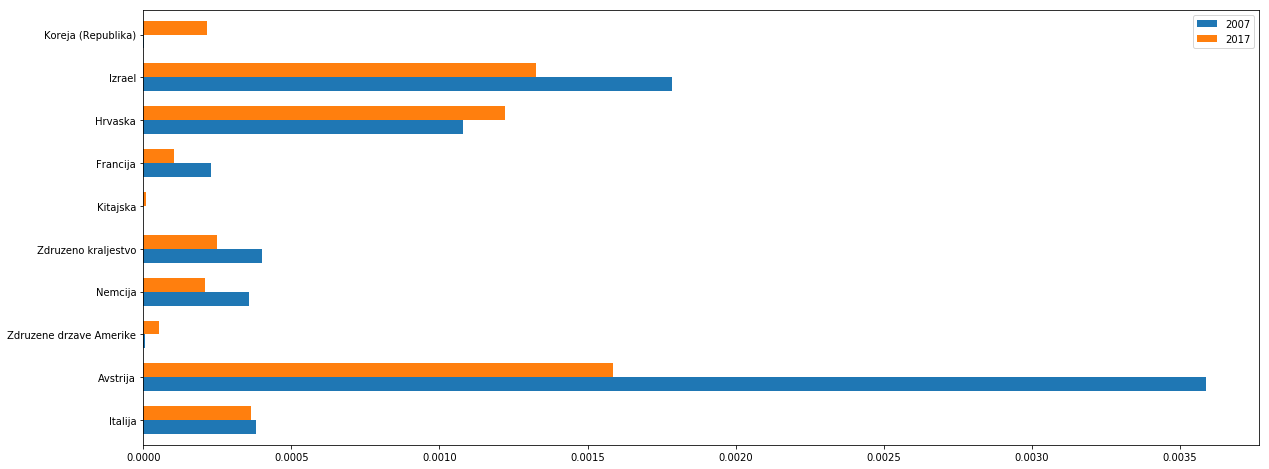

In [5]:
absolute07 = []
absolute17 = []
for country in countries:
    absolute07.append(b07[a07.index(country)])
    absolute17.append(b17[a17.index(country)])

populations = [59, 8, 329, 82, 66, 1400, 65, 4, 8, 51]
population07 = []
population17 = []
for x1, x2, y in zip(absolute07, absolute17, populations):
    population07.append(x1 / (y * 1000000))
    population17.append(x2 / (y * 1000000))
    
df = pandas.DataFrame({'2007': population07, '2017': population17}, index = countries)
 
df.plot.barh(width = 0.65, figsize=(20, 8));

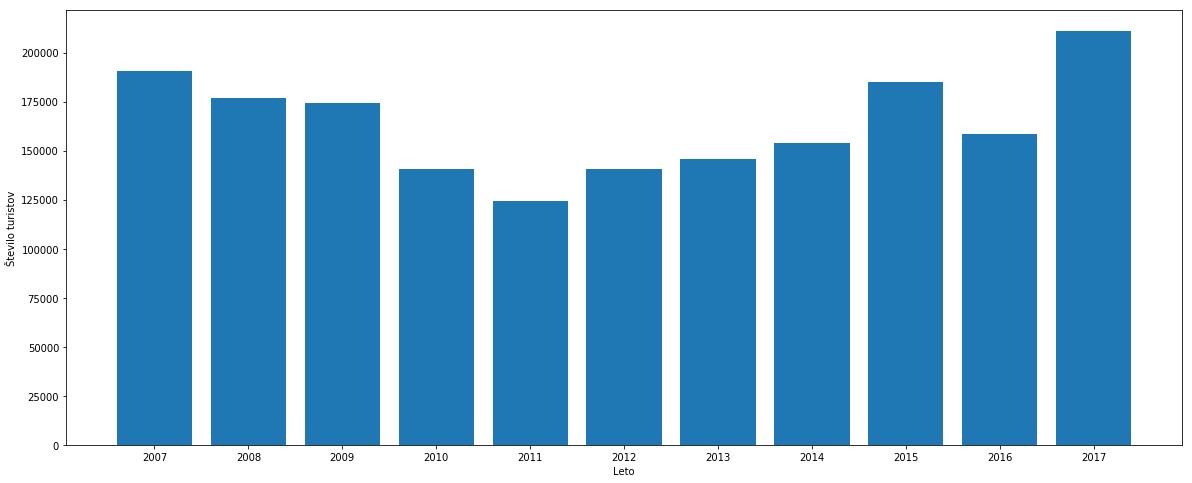

In [6]:
turistiSum = []
prenocitveSum = []
for i in range(11):
    turistiSum.append(sum(turisti[i]))
    prenocitveSum.append(sum(prenocitve[i]))

plt.figure(figsize=(20,8))   
#plt.barh(np.arange(len(turistiSum)), turistiSum, tick_label=range(2007, 2018))
plt.bar(np.arange(len(turistiSum)), turistiSum, tick_label=range(2007, 2018))
plt.xlabel("Leto")
plt.ylabel("Število turistov")
plt.show()

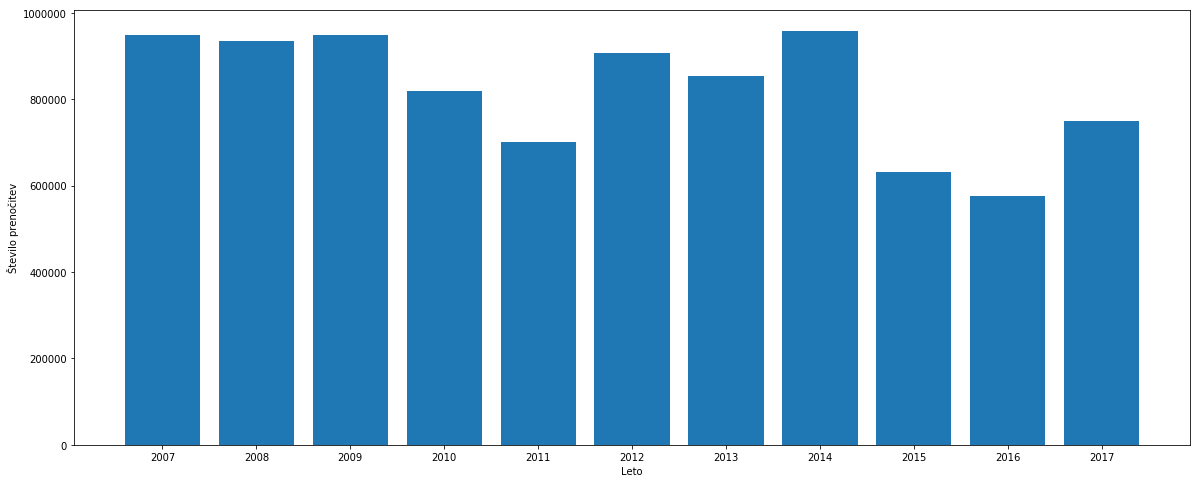

In [7]:
plt.figure(figsize=(20,8))   
plt.bar(np.arange(len(prenocitveSum)), prenocitveSum, tick_label=range(2007, 2018))
plt.xlabel("Leto")
plt.ylabel("Število prenočitev")
plt.show()

In [8]:
obcine = []
turisti    = [[], [], [], [], [], [], [], [], [], []]
prenocitve = [[], [], [], [], [], [], [], [], [], []]
meseci = ["januar", "februar", "marec", "april", "maj", "junij", "julij", "avgust", "september", "oktober", "november", "december"]
reader = DictReader(open('podatki/turisti_po_obcinah_brez_drzav.csv', 'rt', encoding='latin1'))
first = True
for row in reader:
    obcina = row["obcina"]
    if obcina == "SLOVENIJA":
        continue
    obcine.append(obcina)
    for i in range(8, 18):
        for j in range(12):
            turisti[i-8].append([])
            turisti[i-8][j].append(int(row[meseci[j] + "Tur" + str(i)]))
            prenocitve[i-8].append([])
            prenocitve[i-8][j].append(int(row[meseci[j] + "Pren" + str(i)]))

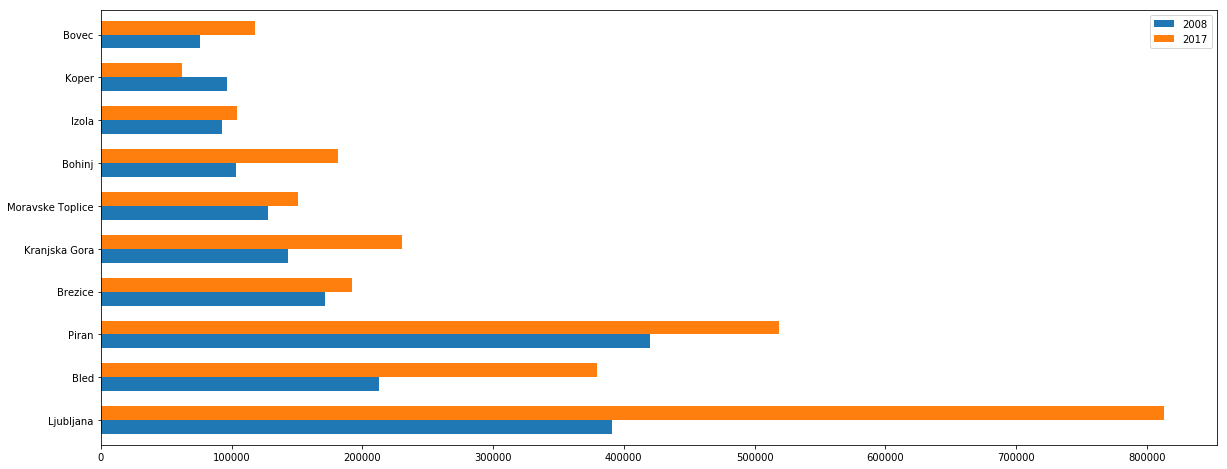

In [9]:
#top 10 za 2008 in 2017

sums08 = []
sums17 = []
for i in range(len(obcine)):
    currentSum08 = 0
    currentSum17 = 0
    for j in range(12):
        currentSum08 += turisti[0][j][i]
        currentSum17 += turisti[9][j][i]
    sums08.append(currentSum08)
    sums17.append(currentSum17)

obc = ["Ljubljana", "Bled", "Piran", "Brezice", "Kranjska Gora", "Moravske Toplice", "Bohinj", "Izola", "Koper", "Bovec"]
    
val08 = []
val17 = []
for obcina in obc:
    val08.append(sums08[obcine.index(obcina)])
    val17.append(sums17[obcine.index(obcina)])

df = pandas.DataFrame({'2008': val08, '2017': val17}, index = obc)
 
df.plot.barh(width = 0.65, figsize=(20, 8));

In [10]:
turisti_po_letih = []
turisti_po_mesecih = []
for i in range(10):
    currentSum = 0
    for j in range(12):
        currentSum += sum(turisti[i][j])
        turisti_po_mesecih.append(sum(turisti[i][j]))
    turisti_po_letih.append(currentSum)

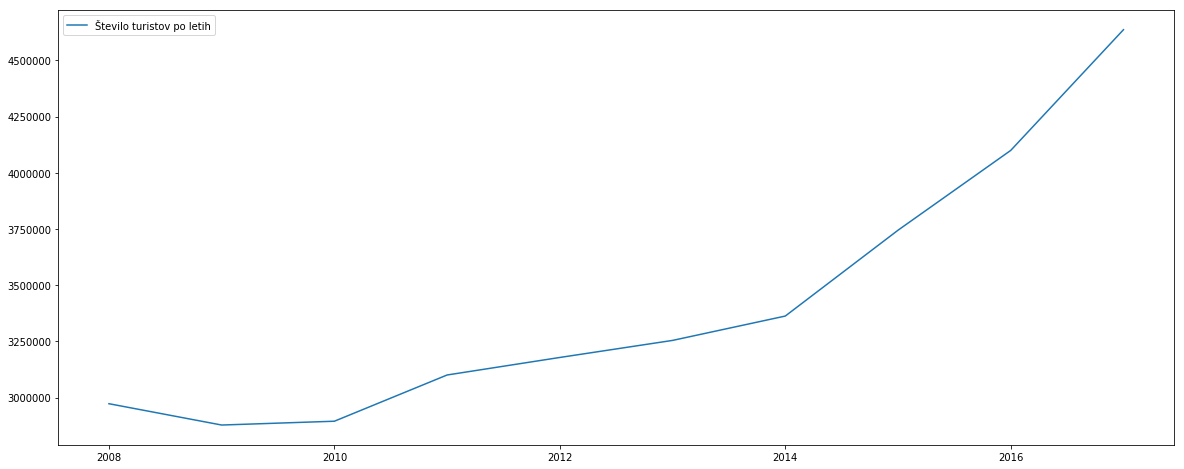

In [11]:
df = pandas.DataFrame({'Število turistov po letih': turisti_po_letih}, index = range(2008, 2018))
df.plot.line(figsize=(20,8));

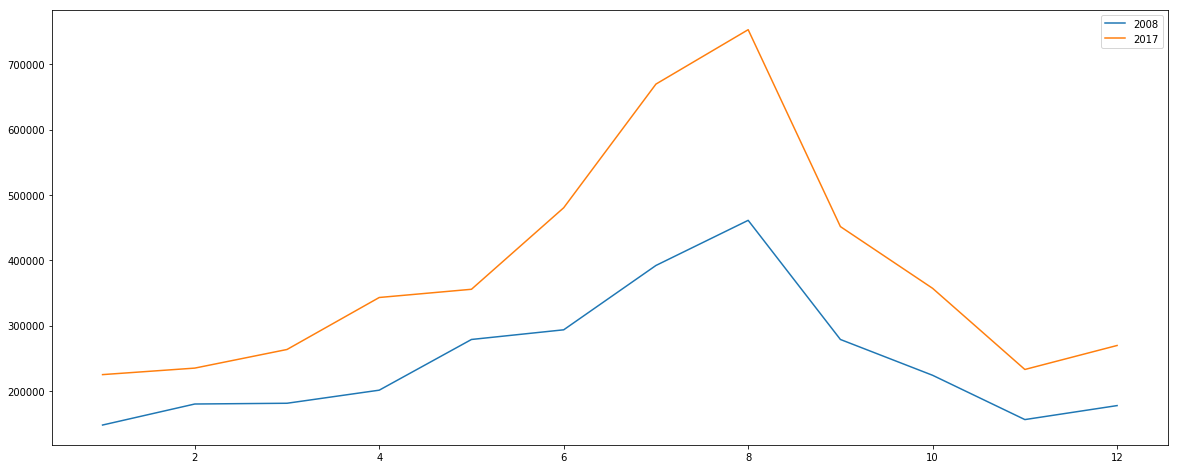

In [12]:
df = pandas.DataFrame({'2008': turisti_po_mesecih[:12], '2017': turisti_po_mesecih[-12:]}, index = range(1,13))
df.plot.line(figsize=(20,8));

In [13]:
meseciLj = []
meseciKg = []
meseciIz = []
for i in range(10):
    for j in range(12):
        meseciLj.append(turisti[i][j][obcine.index("Ljubljana")])
        meseciKg.append(turisti[i][j][obcine.index("Kranjska Gora")])
        meseciIz.append(turisti[i][j][obcine.index("Izola")])

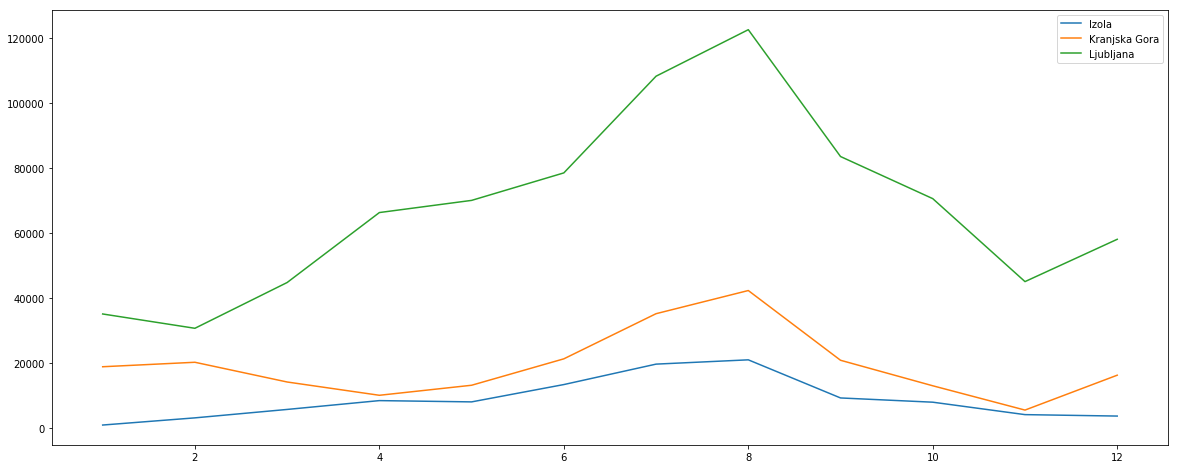

In [14]:
df = pandas.DataFrame({'Ljubljana': meseciLj[-12:], 'Kranjska Gora': meseciKg[-12:], 'Izola': meseciIz[-12:]}, index = range(1,13))
df.plot.line(figsize=(20,8));

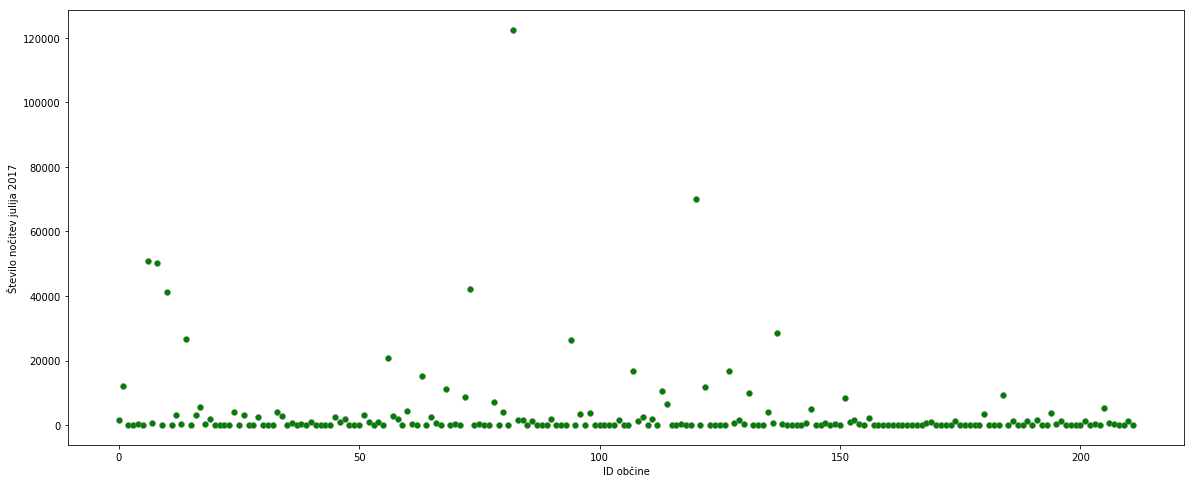

In [15]:
turisti_po_obcinah = []
for i in range(len(obcine)):
    turisti_po_obcinah.append(turisti[9][7][i])
plt.figure(figsize=(20,8))
plt.scatter(range(len(obcine)), turisti_po_obcinah, c="green", edgecolors="grey", linewidths=0.5)
plt.ylabel("Število nočitev julija 2017")
plt.xlabel("ID občine")
plt.show()